<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW#1 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Лукишн Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions (15%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Опишите, как изменяется адаптивная способность алгоритма ЭСС при изменении параметра $\alpha$ от 0 до 1.

Когда альфа ближе к 1, то он в основном учитывает только последние значения, то есть адаптируется быстрее, так как ему меньше значений для этого нужно => адаптивная способность больше, когда альфа больше к нулю, наоборот.

**Вопрос 2**: Каким следует выбрать параметр сглаживания тренда $\alpha_2$ в модели Хольта (линейный тренд) в случае, когда вы предсказываете временной ряд 1) с плавно меняющимя трендом; 2) стохастически меняющися трендом?

Мне кажется, что альфа должно быть больше в случае плавно меняющегося тренда, так чтобы уровень l оставался приимерно одинаковым.

**Вопрос 3**: Докажите  эквивалетность формул расчёта (в рекуррентной форме и в форме корректировки прогноза (correction error form) )скрытых компонент временного ряда в модели Тейла-Вейджа (период сезонность обозначается $p$):
$$l_t = \alpha (y_t - s_{t-p}) + (1-\alpha) (l_{t-1} + b_{t-1}) \color{red}{=} l_{t-1} + b_{t-1} + \alpha e_t;$$,
    $$ b_t = \beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1} \color{red}{=} b_{t-1} + \alpha\beta e_t;$$,
    $$ s_t = \gamma (y_t-l_t) + (1-\gamma) s_{t-p} \color{red}{=} s_{t-p} + \gamma(1-\alpha)e_t.$$,

<фоточка>

**Вопрос 4**: Выведите формулу расчёта скрытых компонент в форме корректировки прогноза (correction error form) временного ряда в модели ЭС с линейным затухающим трендом (WS with additive damped trend):

$$\hat{y}_{t+d|t} = l_t + \left(\phi + \phi^2 + \dots + \phi^{d}\right) b_t.$$,
   
Скрытые компоненты ВР согласно модели в рекуррентной форме записываются:
    $$ l_{t}       = \alpha y_t + \left(1-\alpha\right) \left(l_{t-1} +\phi b_{t-1}\right),$$,
    $$ b_t         = \beta \left(l_t - l_{t-1}\right) + \left(1-\beta\right)\phi b_{t-1}.$$


<Ответ>

-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center"> Practice</h1>
#  1. reading data (5%)

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)

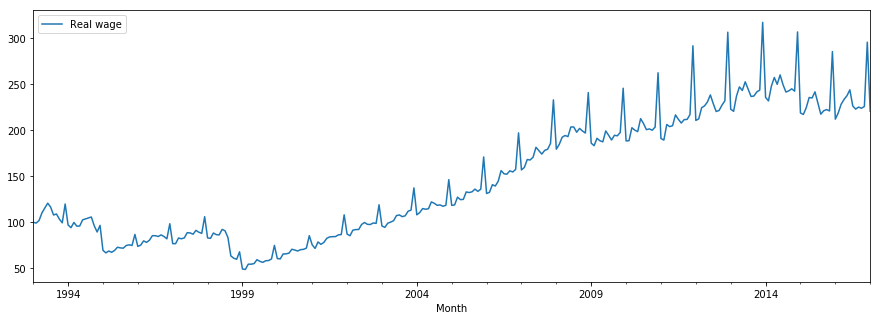

In [1]:
# start with this code
import pandas as pd
import numpy as np
from utils import InitExponentialSmoothing, BuildForecast, plotTSForecast
from utils import qualityRMSE, qualityMedianAE, qualityMACAPE, qualitySSE, qualityMSE, qualityMAPE 

%matplotlib inline


wage = pd.read_csv('monthly-wage.csv', sep=";", parse_dates=True, dayfirst=True, index_col=0)

# Put your code below
wage.plot(figsize=(15,5))

In [2]:
wage = wage.sort_index() # sort index
wage.head()

,Real wage
Month,
1993-01-01,100.00
1993-02-01,99.04
1993-03-01,101.77
1993-04-01,110.05
1993-05-01,115.47


# 2. Build the Forecast with  IES (5%)

You need to apply IES model (see seminar 1) for the TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.


* 0) Forecast Wage TS with SES $\alpha=.1$.
* 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You 
can choose any loss function above).
* 2) Draw the forecast that correspond to IES with optimial value $\alpha$ (use time steps from 09.1998 to 01.2017.)
     Conclude whether IES can be used for this TS? If can not than explain why.
* 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]. (You can choose any Loss function from seminar 1).

## 0)

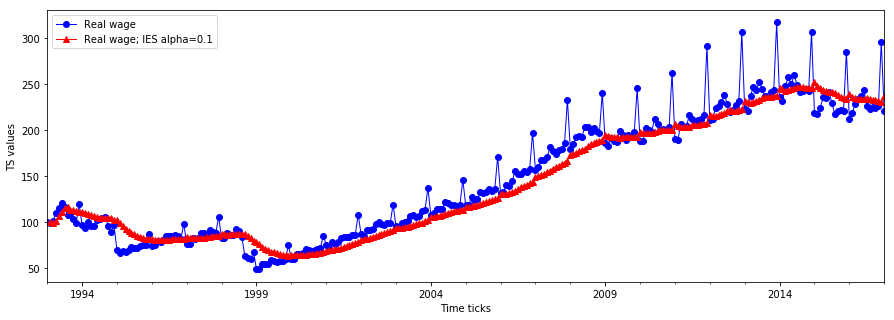

In [3]:
ESParamsArray = [{'alpha':0.1, 'AdaptationPeriod':10}]
FRC_WAGE = BuildForecast(h=1, ts=wage, AlgName='InitExponentialSmoothing', AlgTitle='IES' ,ParamsArray = ESParamsArray)

plotTSForecast(wage.loc['1993-01-01':'2017-01-01'], FRC_WAGE[list(FRC_WAGE)[0]].loc['1993-01-01':'2017-01-01']
               , ts_num=0, alg_title='IES alpha=0.1')

## 1) Search for the optimal $\alpha$ 

In [4]:
ALPHA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
ESParamsArray = [{'alpha':alpha, 'AdaptationPeriod':0} for alpha in ALPHA]
FRC_WAGE = BuildForecast(h=1, ts=wage, AlgName='InitExponentialSmoothing', AlgTitle='ES' ,ParamsArray=ESParamsArray)

In [5]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())

ix = wage.loc["1998-09-01" : "2015-01-01"].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMSE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

ES {'alpha': 0.2, 'AdaptationPeriod': 0}      278.055923
ES {'alpha': 0.4, 'AdaptationPeriod': 0}      289.763267
ES {'alpha': 0.15, 'AdaptationPeriod': 0}     294.934062
ES {'alpha': 0.1, 'AdaptationPeriod': 0}      351.655739
ES {'alpha': 0.7, 'AdaptationPeriod': 0}      355.850676
ES {'alpha': 0.05, 'AdaptationPeriod': 0}     628.281780
ES {'alpha': 0.01, 'AdaptationPeriod': 0}    3486.543879
dtype: float64

Побеждает alpha ближе к нулю. (0.2)

## 2) draw the forecast with optimial value $\alpha $

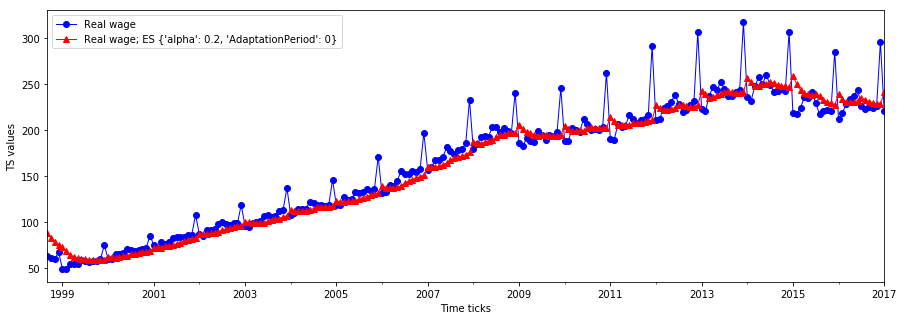

In [6]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc["1998-09-01" : "2017-01-01"], FRC_WAGE[algName].loc["1998-09-01" : "2017-01-01"]
               , ts_num=0, alg_title=algName)

** Question**
    * Does SES follow to the TS components?

Yes!!!

## 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]

In [7]:
qualityMSE(wage.loc["2015-02-01":"2017-01-01"], FRC_WAGE[algName].loc["2015-02-01":"2017-01-01"])[0]

Real wage    501.02643
dtype: float64

# 3. Winters model for Additive Seasonality (25%)
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw the forecast that correspond optimal values $\alpha$ and $\gamma$ (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of IES: is it better? 
* 5) Conclude whether Winter's ES can be used for this TS?

## 0) BuildForecast

In [8]:
import math

def BuildForecast(h, ts, AlgName, AlgTitle, ParamsArray, step='D'):
	FRC_TS = dict()
	for p in ParamsArray:
		frc_horizon = pd.date_range(ts.index[-1], periods=h+1, freq=step)[1:]
		frc_ts = pd.DataFrame(index = ts.index.append(frc_horizon), columns = ts.columns)
		
		for cntr in ts.columns:
			frc_ts[cntr] = eval(AlgName)(ts[cntr], h, p)
		
#         frc_ts.columns = frc_ts.columns+('%s %s' % (AlgTitle, p))
		FRC_TS['%s %s' % (AlgTitle, p)] = frc_ts
	return FRC_TS

## 1)

In [9]:
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN] * (T + h)
    
    l = np.NaN
    s = [np.NaN] * (T + h)
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = np.array(x[:(cntr + 1)]).mean()
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= x[cntr] / l 
 
            l = alpha * x[cntr] / s[cntr - p] + (1 - alpha) * l
            s[cntr] = delta * x[cntr] / l + (1 - delta) * s[cntr - p]
            FORECAST[cntr + h] = l * s[cntr - p + (h % p)]
    return FORECAST

## 2)

In [10]:
ALPHA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
DELTA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
WinterParamsArray = [{'alpha':alpha, 'delta':delta, 'seasonality_period':12} 
                     for alpha in ALPHA for delta in DELTA]
WINT_WAGE = BuildForecast(h=1,
                          ts=wage,
                          AlgName='WintersExponentialSmoothing',
                          AlgTitle='Winter',
                          ParamsArray=WinterParamsArray)

In [11]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = WINT_WAGE.keys())

ix = wage.loc["1998-09-01" : "2015-01-01"].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = WINT_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMSE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

Winter {'alpha': 0.4, 'seasonality_period': 12, 'delta': 0.7}        26.480967
Winter {'alpha': 0.4, 'seasonality_period': 12, 'delta': 0.4}        31.497175
Winter {'alpha': 0.7, 'seasonality_period': 12, 'delta': 0.7}        33.536950
Winter {'alpha': 0.2, 'seasonality_period': 12, 'delta': 0.7}        51.225899
Winter {'alpha': 0.2, 'seasonality_period': 12, 'delta': 0.4}        54.506434
Winter {'alpha': 0.4, 'seasonality_period': 12, 'delta': 0.2}        55.844343
Winter {'alpha': 0.7, 'seasonality_period': 12, 'delta': 0.4}        56.059923
Winter {'alpha': 0.2, 'seasonality_period': 12, 'delta': 0.2}        67.045292
Winter {'alpha': 0.15, 'seasonality_period': 12, 'delta': 0.7}       67.272942
Winter {'alpha': 0.15, 'seasonality_period': 12, 'delta': 0.4}       73.677105
Winter {'alpha': 0.4, 'seasonality_period': 12, 'delta': 0.15}       74.729169
Winter {'alpha': 0.2, 'seasonality_period': 12, 'delta': 0.15}       78.652325
Winter {'alpha': 0.15, 'seasonality_period': 12, 'de

## 3)

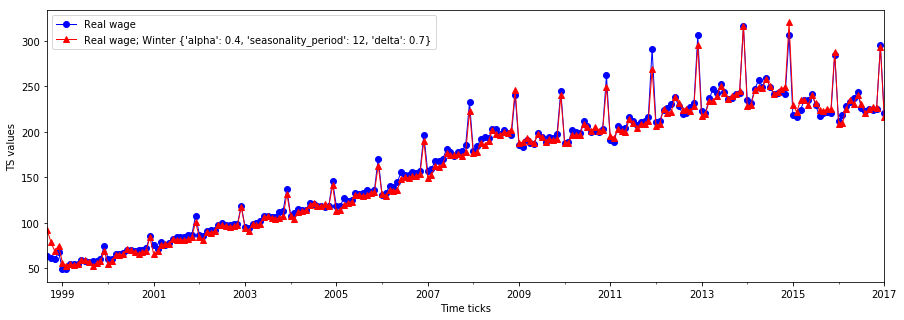

In [12]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc["1998-09-01" : "2017-01-01"], WINT_WAGE[algName].loc["1998-09-01" : "2017-01-01"]
               , ts_num=0, alg_title=algName)

## 4)

In [13]:
qualityMSE(wage.loc["2015-02-01":"2017-01-01"], WINT_WAGE[algName].loc["2015-02-01":"2017-01-01"])[0]

Real wage    19.829508
dtype: float64

Yes!! It is way better

## 5)

I beg it SHOUD be used. We can see as awesome it guesses the seasonality.

# 4. Theil-Wage model for TS with linear trend and seasonality (25%)
You need to realize Theil-Wage model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model for
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

## 1)

In [14]:
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def Theil_Wage(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN] * (T + h)
    
    l = np.NaN
    b = np.NaN
    s = [np.NaN] * (T + h)
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = np.array(x[:(cntr + 1)]).mean()
            
            if math.isnan(b):
                b = 0.
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= x[cntr] - l 
            
            l_t_1 = l
            l = alpha * (x[cntr] - s[cntr - p]) + (1 - alpha) * (l + b)
            b = beta * (l - l_t_1) + (1 - beta) * b
            s[cntr] = delta * (x[cntr] - l) + (1 - delta) * s[cntr - p]
            FORECAST[cntr + h] = l + b * h + s[cntr - p + (h % p)]
    return FORECAST

In [15]:
ALPHA = [0.7, 0.4, 0.2, 0.01]
BETA = [0.7, 0.4, 0.2, 0.01]
DELTA = [0.7, 0.4, 0.2, 0.01]
TheilParamsArray = [{'alpha':alpha, 'delta':delta, 'beta':beta,
                      'seasonality_period':12} 
                     for alpha in ALPHA for delta in DELTA for beta in BETA]
THEIL_WAGE = BuildForecast(h=1,
                          ts=wage,
                          AlgName='Theil_Wage',
                          AlgTitle='Theil-Wage',
                          ParamsArray=TheilParamsArray)

In [16]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = THEIL_WAGE.keys())

ix = wage.loc["1998-09-01" : "2015-01-01"].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = THEIL_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMSE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

Theil-Wage {'alpha': 0.4, 'beta': 0.01, 'seasonality_period': 12, 'delta': 0.7}         28.968924
Theil-Wage {'alpha': 0.4, 'beta': 0.2, 'seasonality_period': 12, 'delta': 0.7}          29.477349
Theil-Wage {'alpha': 0.4, 'beta': 0.2, 'seasonality_period': 12, 'delta': 0.4}          39.103232
Theil-Wage {'alpha': 0.4, 'beta': 0.01, 'seasonality_period': 12, 'delta': 0.4}         41.140847
Theil-Wage {'alpha': 0.2, 'beta': 0.2, 'seasonality_period': 12, 'delta': 0.7}          43.217195
Theil-Wage {'alpha': 0.7, 'beta': 0.01, 'seasonality_period': 12, 'delta': 0.7}         44.205849
Theil-Wage {'alpha': 0.4, 'beta': 0.4, 'seasonality_period': 12, 'delta': 0.4}          44.858975
Theil-Wage {'alpha': 0.2, 'beta': 0.01, 'seasonality_period': 12, 'delta': 0.7}         46.269011
Theil-Wage {'alpha': 0.2, 'beta': 0.2, 'seasonality_period': 12, 'delta': 0.4}          46.300395
Theil-Wage {'alpha': 0.2, 'beta': 0.4, 'seasonality_period': 12, 'delta': 0.4}          47.340721
Theil-Wage {'alpha':

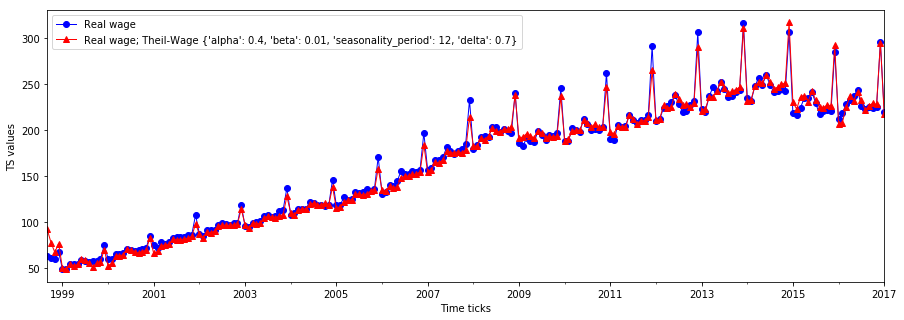

In [17]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc["1998-09-01" : "2017-01-01"], THEIL_WAGE[algName].loc["1998-09-01" : "2017-01-01"]
               , ts_num=0, alg_title=algName)

In [18]:
qualityMSE(wage.loc["2015-02-01":"2017-01-01"], THEIL_WAGE[algName].loc["2015-02-01":"2017-01-01"])[0]

Real wage    28.588241
dtype: float64

Эта модель не так хорошо обрабатывает сезонность, но можно попробовать добавить мультипликативную сезонность, чтобы типа масштаб сезонного прироста сохранялся.

# 5. Non-additive model of ES (25%)
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it by expert opinion (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-Wage model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diveret

In [19]:
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def Holt_Winter(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN] * (T + h)
    
    l = np.NaN
    b = np.NaN
    s = [np.NaN] * (T + h)
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = np.array(x[:(cntr + 1)]).mean()
            
            if math.isnan(b):
                b = 0.
 
            if math.isnan(s[cntr % p]):
                s[cntr % p] = x[cntr] / (l + b) 
            
            l_t_1 = l
            b_t_1 = b
            l = alpha * x[cntr] / s[cntr - p] + (1 - alpha) * (l_t_1 + b_t_1)
            b = beta * (l - l_t_1) + (1 - beta) * b_t_1
            s[cntr] = delta * x[cntr] / (l_t_1 + b_t_1) + (1 - delta) * s[cntr - p]
            FORECAST[cntr + h] = (l + b * h) * s[cntr - p + (h % p)]
    return FORECAST

In [20]:
ALPHA = [0.7, 0.4, 0.2, 0.01]
BETA = [0.7, 0.4, 0.2, 0.01]
DELTA = [0.7, 0.4, 0.2, 0.01]
HoltWinterParamsArray = [{'alpha':alpha, 'delta':delta, 'beta':beta,
                      'seasonality_period':12} 
                     for alpha in ALPHA for delta in DELTA for beta in BETA]
HOLT_WINTER = BuildForecast(h=1,
                          ts=wage,
                          AlgName='Holt_Winter',
                          AlgTitle='Holt_Winter',
                          ParamsArray=HoltWinterParamsArray)

In [21]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = HOLT_WINTER.keys())

ix = wage.loc["1998-09-01" : "2015-01-01"].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = HOLT_WINTER[param_cntr]
    QualityStr[param_cntr],_ = qualityMSE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

Holt_Winter {'alpha': 0.7, 'beta': 0.01, 'seasonality_period': 12, 'delta': 0.7}      1.861995e+01
Holt_Winter {'alpha': 0.7, 'beta': 0.01, 'seasonality_period': 12, 'delta': 0.4}      1.936153e+01
Holt_Winter {'alpha': 0.4, 'beta': 0.2, 'seasonality_period': 12, 'delta': 0.4}       2.163911e+01
Holt_Winter {'alpha': 0.4, 'beta': 0.01, 'seasonality_period': 12, 'delta': 0.4}      2.393370e+01
Holt_Winter {'alpha': 0.4, 'beta': 0.01, 'seasonality_period': 12, 'delta': 0.7}      2.634765e+01
Holt_Winter {'alpha': 0.4, 'beta': 0.2, 'seasonality_period': 12, 'delta': 0.2}       3.150945e+01
Holt_Winter {'alpha': 0.4, 'beta': 0.01, 'seasonality_period': 12, 'delta': 0.2}      3.161450e+01
Holt_Winter {'alpha': 0.7, 'beta': 0.01, 'seasonality_period': 12, 'delta': 0.2}      3.189692e+01
Holt_Winter {'alpha': 0.2, 'beta': 0.2, 'seasonality_period': 12, 'delta': 0.4}       3.969144e+01
Holt_Winter {'alpha': 0.2, 'beta': 0.7, 'seasonality_period': 12, 'delta': 0.2}       4.146382e+01
Holt_Winte

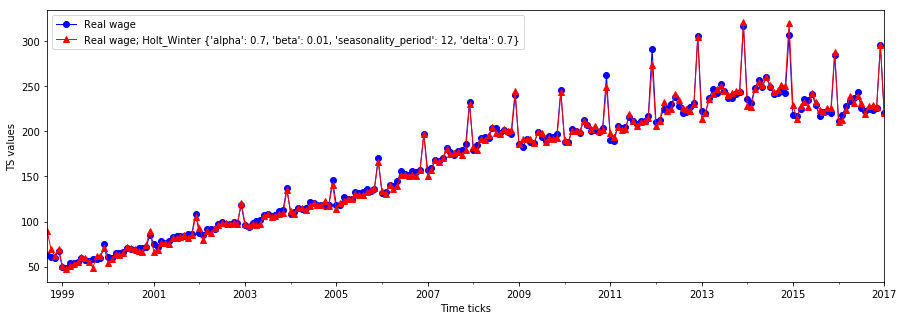

In [22]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc["1998-09-01" : "2017-01-01"], HOLT_WINTER[algName].loc["1998-09-01" : "2017-01-01"]
               , ts_num=0, alg_title=algName)

In [23]:
qualityMSE(wage.loc["2015-02-01":"2017-01-01"], HOLT_WINTER[algName].loc["2015-02-01":"2017-01-01"])[0]

Real wage    17.126906
dtype: float64

Работает! Мультипликативная сезонность тут хорошо себя проявляет.